# Machine Learning Pokemon



###**// Análise Exploratória dos Dados //**

*Importação de bibliotecas básicas*



In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

*Plotagem dos dados*

In [2]:
data = pd.read_csv('pokemon2.csv')

data.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


**Explicação da plotagem:**
Name : Nome do Pokemon

Type1 : A primeira classe do Pokemon

Type2 : A segunda classe do Pokemon ( Número de NaN altos )

HP : O total de vida do Pokemon

Attack : Ataque do Pokemon

Defense : Defesa do Pokemon

Sp. Atk : Força do ataque carregado do Pokemon

Sp. Def : Força da defesa carregada do Pokemon

Speed : Velocidade do pokemon

Generation : Geração do Pokemon (1 à 6)

Legendary : Se o Pokemon é lendário ou não

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


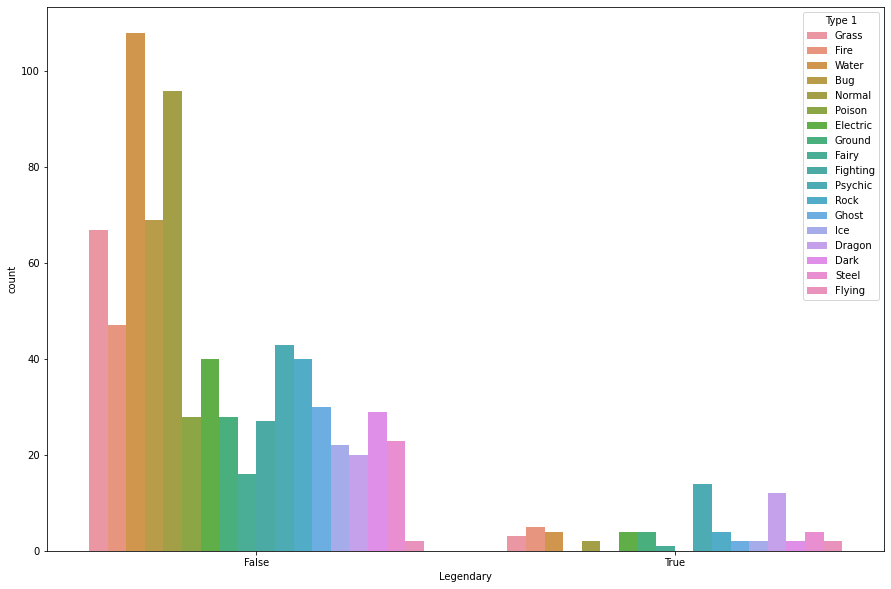

In [3]:
fig,ax = plt.subplots(figsize=(15,10),)
sns.countplot(data.Legendary,hue=data["Type 1"],ax=ax,)
#plt.savefig('tipos_quantidade.png', dpi = 300)#
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


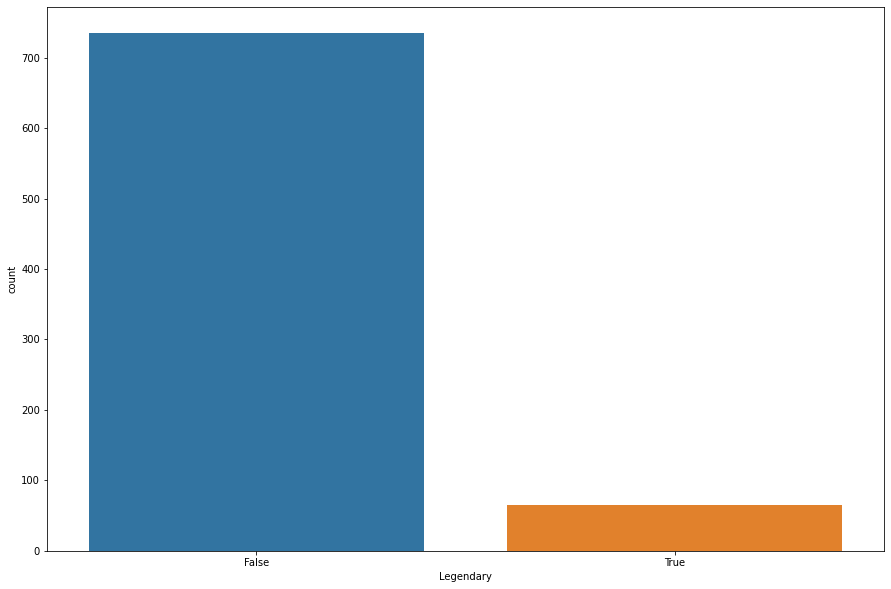

In [4]:
fig,ax = plt.subplots(figsize=(15,10))
sns.countplot(data.Legendary,ax=ax)
#plt.savefig('lendarios_quantidade.png', dpi = 300)#
plt.show()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [6]:
#Alto número de NaN na classe " Type 2" devido à não necessidade de 2 tipos para todos os pokemons. Necessário retira-los.

### **Limpeza de Dados**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [8]:
data.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [9]:
data.drop(["Name","#"],axis=1,inplace=True)

In [10]:
data.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,45,49,49,65,65,45,1,False
1,Grass,Poison,60,62,63,80,80,60,1,False
2,Grass,Poison,80,82,83,100,100,80,1,False
3,Grass,Poison,80,100,123,122,120,80,1,False
4,Fire,NaN,39,52,43,60,50,65,1,False


In [11]:
data.Legendary = data.Legendary.astype(int)
data.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,45,49,49,65,65,45,1,0
1,Grass,Poison,60,62,63,80,80,60,1,0
2,Grass,Poison,80,82,83,100,100,80,1,0
3,Grass,Poison,80,100,123,122,120,80,1,0
4,Fire,NaN,39,52,43,60,50,65,1,0


In [12]:
type1 = list(data["Type 1"].unique())
type2 = list(data["Type 2"].unique())
type2.remove(np.nan)

type1 = list(zip(type1,[i for i in range(1,len(type1)+1)]))
type2 = list(zip(type2,[i for i  in range(1,len(type2)+1)]))

In [13]:
data2 = data.copy()
type1_list = [i for i in range(0,len(data))]
for type_,value in type1:
    
    index = data[data["Type 1"] == type_].index.values
    for ind in index:
        type1_list[ind] = value

        
type2_list = [0 if type(each)==type(np.nan) else each for each in data["Type 2"]]

for type_,value in type2:
    
    index = data[data["Type 2"] == type_].index.values
    for ind in index:
        type2_list[ind] = value

In [14]:
data["Type 1"] = type1_list
data["Type 2"] = type2_list
data.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,1,45,49,49,65,65,45,1,0
1,1,1,60,62,63,80,80,60,1,0
2,1,1,80,82,83,100,100,80,1,0
3,1,1,80,100,123,122,120,80,1,0
4,2,0,39,52,43,60,50,65,1,0


In [15]:
data.dtypes

Type 1        int64
Type 2        int64
HP            int64
Attack        int64
Defense       int64
Sp. Atk       int64
Sp. Def       int64
Speed         int64
Generation    int64
Legendary     int64
dtype: object

### *Mapa de correlação entre variáveis*





In [16]:
data.describe()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,7.306250,3.322500,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125
std,4.876955,4.601626,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339
min,1.000000,0.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000
25%,3.000000,0.000000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000
50%,5.000000,1.000000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000
75%,11.000000,6.000000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000
max,18.000000,18.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000


In [17]:
data.corr()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,1.000000,0.151691,0.017041,0.169334,0.228763,0.082983,0.145101,0.041169,0.180687,0.188765
Type 2,0.151691,1.000000,0.037517,0.134978,0.230467,0.125047,0.125893,-0.023254,0.172145,0.042816
HP,0.017041,0.037517,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.169334,0.134978,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.228763,0.230467,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.082983,0.125047,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.145101,0.125893,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.041169,-0.023254,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.180687,0.172145,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.188765,0.042816,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


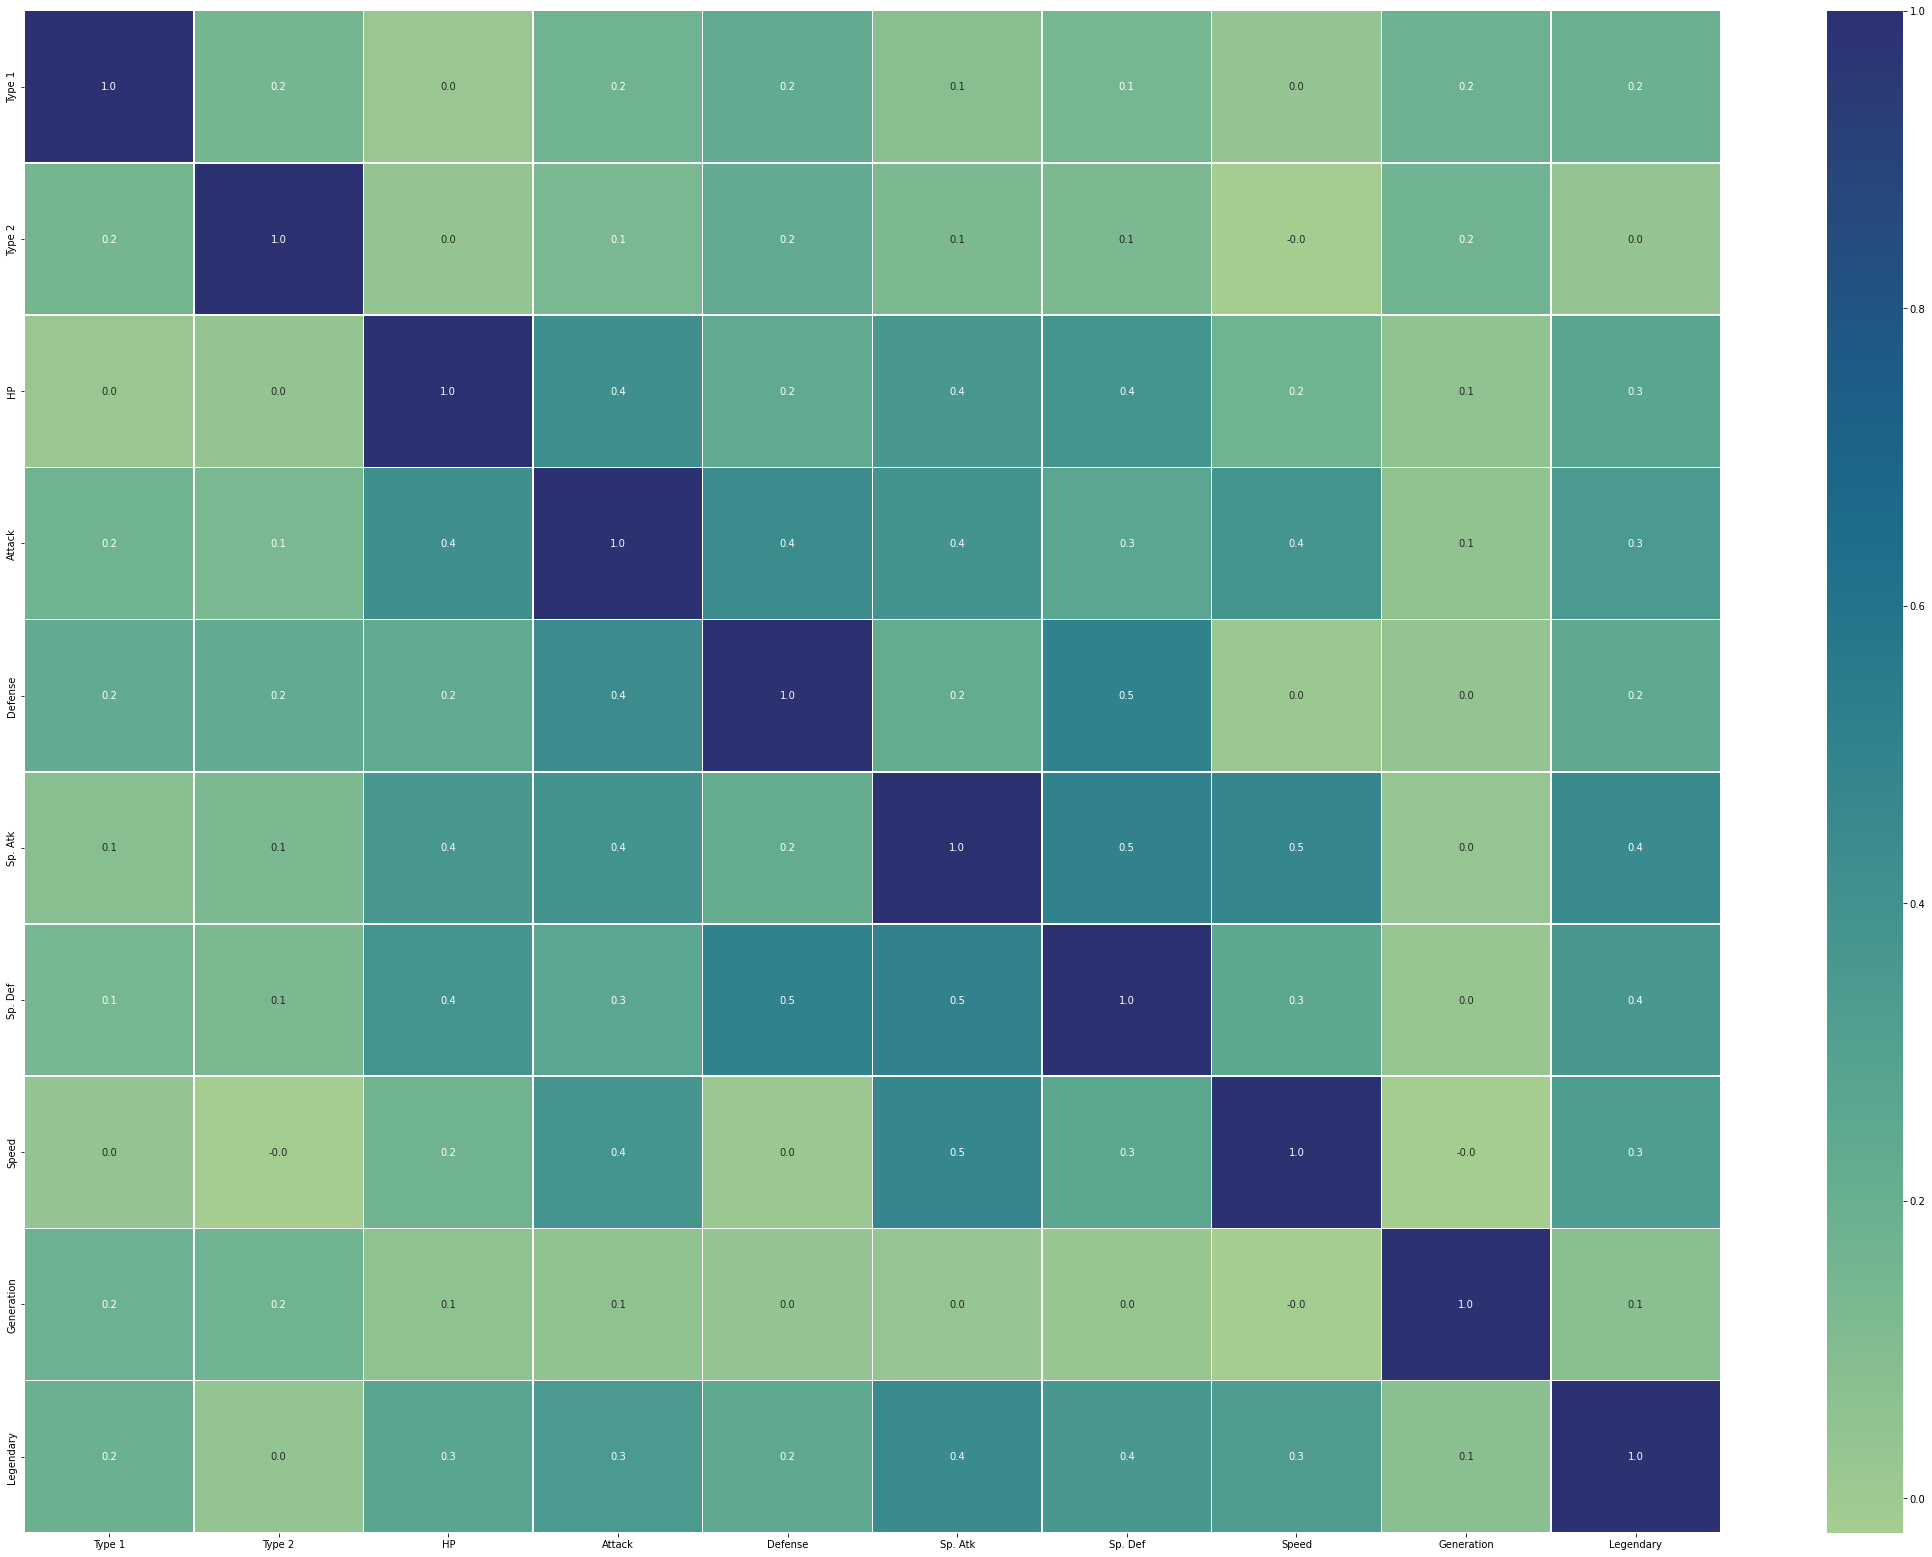

In [18]:
f,ax = plt.subplots(figsize=(38, 28))

sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="crest")
#plt.savefig('correlação.png', dpi = 300)#
plt.show()


### Testando o modelo

In [19]:
x = data.drop("Legendary",axis=1)
y = data["Legendary"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [20]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(x_train,y_train)

Y_pred_knn = knn.predict(x_test)
print(classification_report(Y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       157
           1       0.17      0.67      0.27         3

    accuracy                           0.93       160
   macro avg       0.58      0.80      0.62       160
weighted avg       0.98      0.93      0.95       160



In [21]:
lr = LogisticRegression() 
lr.fit(x_train,y_train) 


Y_pred_lr = lr.predict(x_test)
print(classification_report(Y_pred_lr,y_test))



              precision    recall  f1-score   support

           0       0.98      0.94      0.96       154
           1       0.25      0.50      0.33         6

    accuracy                           0.93       160
   macro avg       0.61      0.72      0.65       160
weighted avg       0.95      0.93      0.94       160



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [22]:

rgr=LinearRegression()
rgr.fit(x_train,y_train)
y_pred = rgr.predict(x_test)

print(rgr.score(x_test,y_test))


0.18799115995500593


In [23]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(x_train,y_train)
Y_pred_dt = dt.predict(x_test)
print(classification_report(Y_pred_dt,y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       152
           1       0.25      0.38      0.30         8

    accuracy                           0.91       160
   macro avg       0.61      0.66      0.63       160
weighted avg       0.93      0.91      0.92       160



In [24]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(x_train,y_train)
Y_pred_dt = dt.predict(x_test)
Y_pred_dt[:5]

array([1, 0, 0, 0, 0])

In [25]:
y_test[:5]

8      0
510    0
175    0
735    0
242    0
Name: Legendary, dtype: int64